# Regression of Used Car Prices Dataset
Run after following notebooks are run:
1. **01_Data_Cleaning**
2. **02_EDA**

## Development Notes/Ideas
- ~~rf~~ - cannot use as would have to OHE
- ~~xgb~~ - cannot use as would have to OHE
- lightgbm
- catboost
- stack


## Libraries

In [1]:
## set up libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
import shap
from sklearn.model_selection import StratifiedKFold

## Load Data

In [2]:
train = pd.read_pickle('train_fe.pkl')
test = pd.read_pickle('test_fe.pkl')

## separate in to features and response variable
x_train = train.drop('price', axis=1)
y_train = train['price']

x_test = test

## Modelling

### LightGBM

In [3]:
## LGBM specific data format
dataset_train = lgb.Dataset(x_train, label=y_train)

## instantiate rf algorithm, using optuna parameters
params = {"verbosity": -1,
        "objective": "regression",
        "metric": "rmse",
        "boosting": "gbdt",
        "learning_rate": 0.002945713769234241,
        "lambda_l1": 0.30000554925347156,
        "lambda_l2": 0.0001890717918321019,
        "num_leaves": 354,
        "feature_fraction": 0.7107068853312993,
        "bagging_fraction": 0.4061813540007248,
        "bagging_freq": 7,
        "max_depth": 6,
        "seed": 888,
        "num_threads": 6
}

## fit model to training data
lgbm = lgb.train(train_set=dataset_train, params=params, num_boost_round=1000)

In [4]:
## cross validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=888)

lgbm_cv = lgb.cv(train_set=dataset_train, params=params, folds=kf, metrics='rmse', num_boost_round=1000); None
print('\n cv rmse:', lgbm_cv['valid rmse-mean'][-1])

c:\Users\steph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:848: UserWarning: The groups parameter is ignored by StratifiedKFold
  warnings.warn(



 cv rmse: 73170.39324640346


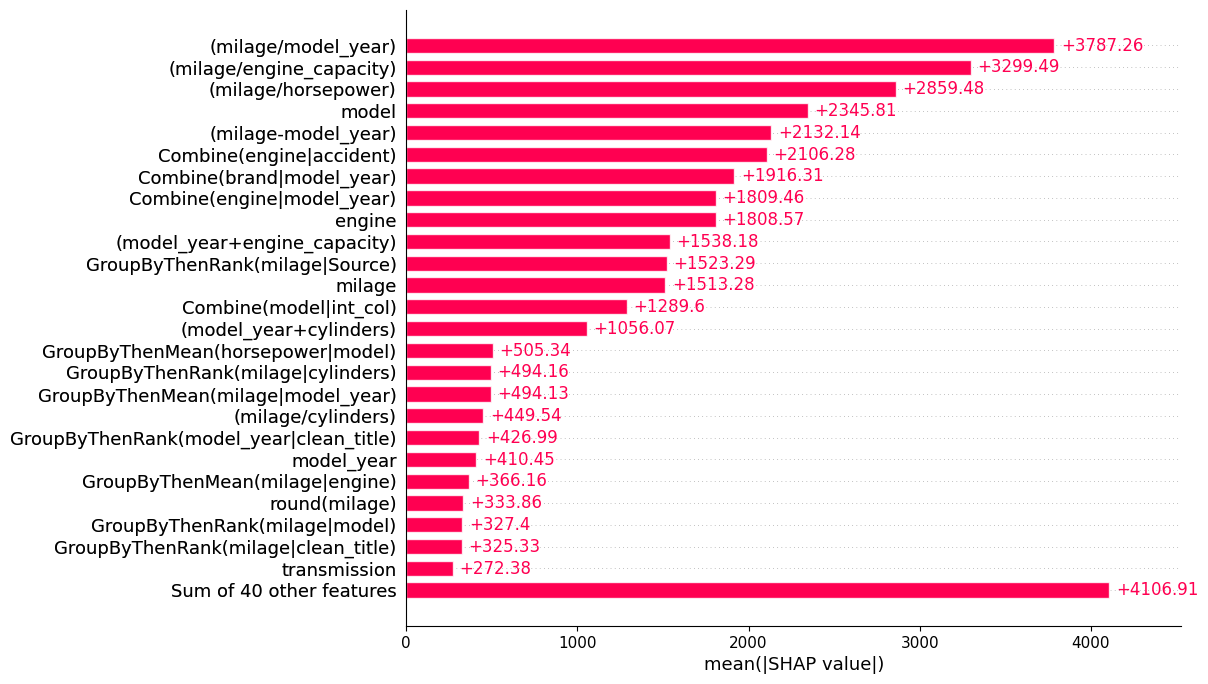

In [5]:
explainer = shap.TreeExplainer(lgbm)
shap_values = explainer(x_train)

fig, ax=plt.subplots(figsize=(10,8))
shap.plots.bar(shap_values, max_display=26, ax=ax)


## Test Predictions

In [6]:
## set up submission format
submission = pd.read_csv('01_Data/sample_submission.csv')
submission['price'] = 0

,price_prediction
count,125690.000000
mean,43643.561951
std,29551.220653
min,1653.791129
25%,22002.180837
50%,37628.546270
75%,55303.725773
max,468832.383567


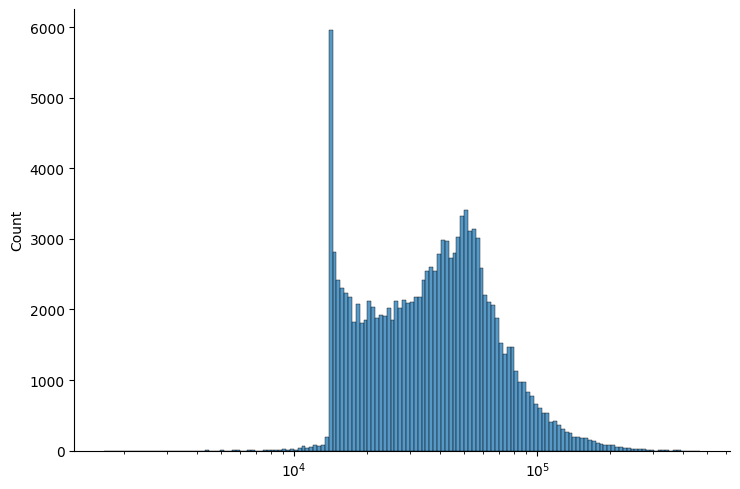

In [7]:
## lgbm prediction
y_testpred_lgbm = lgbm.predict(x_test)
submission['price'] = y_testpred_lgbm
submission.to_csv('02_Submissions/test_pred_lgbm_v1.csv', index=False)

## check prediction distribution
sns.displot(y_testpred_lgbm, aspect=1.5, log_scale=True)
pd.DataFrame({'price_prediction':y_testpred_lgbm}).describe()